# Supervised Learning - Breast Cancer prediction

## Introduction

### About the Dataset
The dataset of this project is from [Kaggle's Breast Cancer Data Page](https://www.kaggle.com/datasets/adhamelkomy/breast-cancer). The dataset includes a variety of features computed from the images, including measurements of cell shape, texture, and size, as well as information about the patient's age and final diagnosis (benign (B) or malignant (M)).

### About the Problem
The aim of this project is to forecast whether a cancer biopsy indicates a benign or malignant condition. It involves a binary classification task, with the diagnosis serving as the target variable, denoted as either benign or malignant.

### Solution
To tackle this issue, we'll employ a supervised learning approach, using the dataset outlined previously. We'll train a model using the training set and subsequently assess its performance using the test set. Evaluation will be based on the accuracy metric, representing the proportion of accurate predictions made by the model.

This project was made by:

| Student                 | number      | email                     |
|-------------------------|-------------|---------------------------|
| André Dantas Rogrigues  | 202108721   | up202108721@edu.fe.up.pt  |
| Inês Martin Soares      | 202108852   | up202108852@edu.fe.up.pt  |

## Import Libraries

Before we import the libraries for this project, we need to install the tools that we will need. For that, we just need to run on the terminal the following command:

- "pip install -r requirements.txt"

Now the imports:

In [15]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
import torch.optim as optim

### First Analysis and peprocessing

The initial analysis and preprocessing involve reading the data, removing unnecessary columns, converting categorical data to numerical data for easier analysis, and ensuring there are no missing values.

In [16]:
bc_data = pd.read_csv('data.csv')

bc_data = bc_data.drop(columns = ['id']) #id not needeed

mapping = {'M': 1, 'B': 0}
to_describe_bc_data = bc_data.copy()
to_describe_bc_data['diagnosis'] = to_describe_bc_data['diagnosis'].map(mapping)

#no null values
bc_data.isnull().count()

diagnosis                  569
radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave_points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave_points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave_points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
dtype: int64

In [17]:
to_describe_bc_data.describe() #more benign (mean closer to 0) (se calhar removemos usando as tecnicas dos slides)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Correlation analysis

The code below performs a correlation analysis to understand the relationship between the diagnosis and the other features and the resulting coefficients indicate how strongly they are associated. They are visualized in a heatmap, where the color intensity represents the strength of the correlation. Lastly, there is a refinement of the Data set to include only the most relevent features for this project.

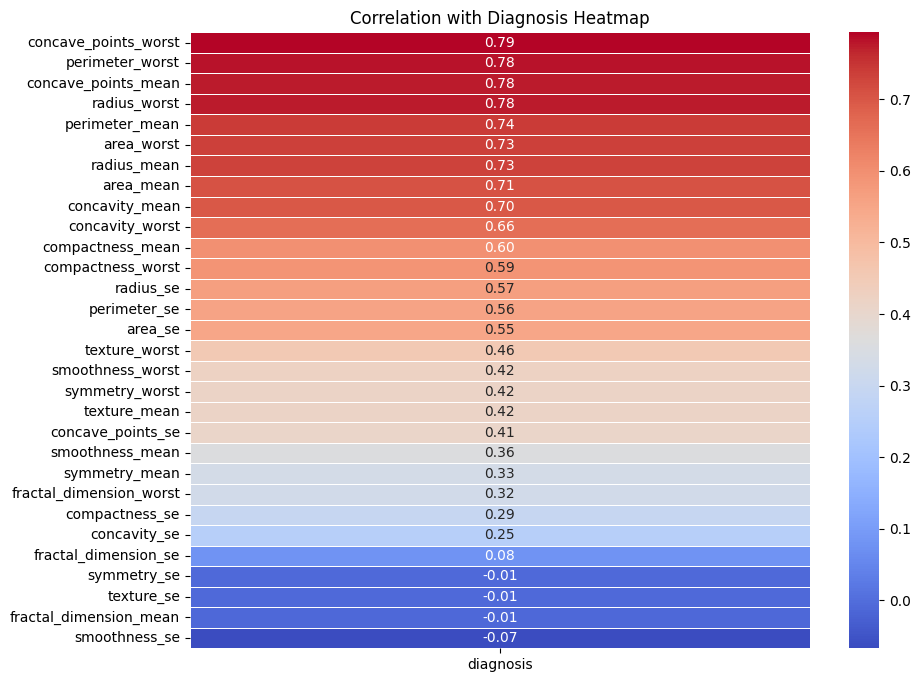

In [18]:
corr_data = to_describe_bc_data.corr()
diagnosis_correlation = corr_data['diagnosis'].drop('diagnosis').sort_values(ascending=False).to_frame()

plt.figure(figsize=(10, 8))
sns.heatmap(diagnosis_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation with Diagnosis Heatmap')
plt.show()

In [19]:
#we will use only columns with more or equal to 0.7 for now 
cleaned_bc_data = bc_data.copy()[['diagnosis', 'concave_points_worst', 'perimeter_worst', 'concave_points_mean', 'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean', 'concavity_mean']]

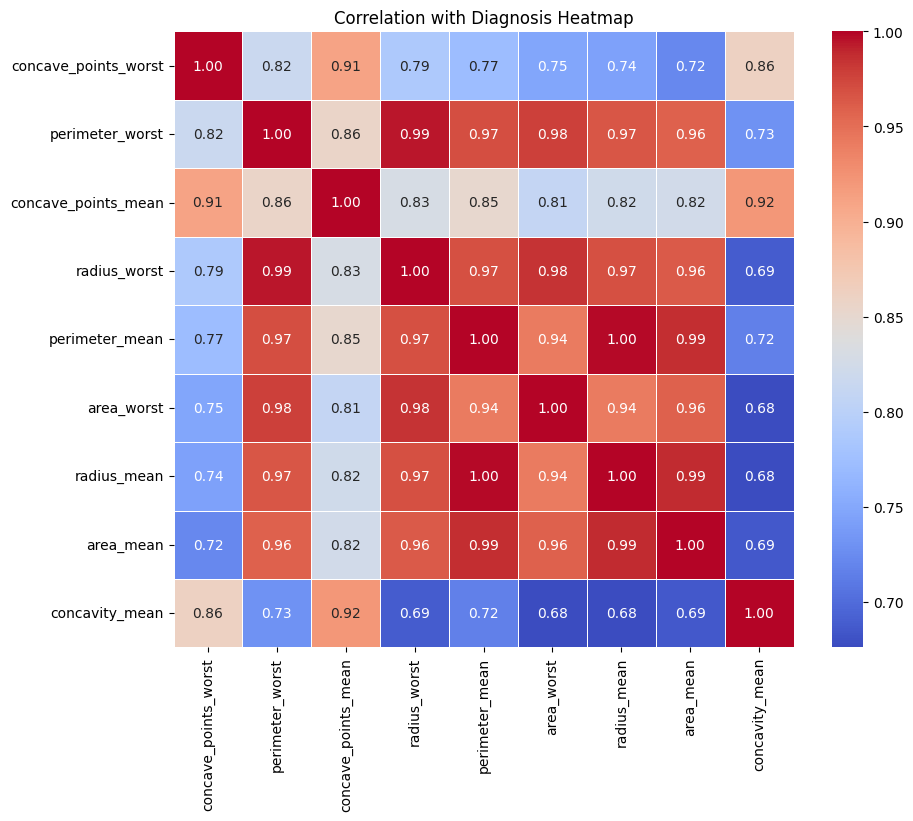

In [20]:
corr_data_clean = cleaned_bc_data.drop(columns=['diagnosis']).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_data_clean, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation with Diagnosis Heatmap')
plt.show()

In [21]:
# Removing similar columns (mainly ..._worst to perimeter_worst and ..._mean to perimeter mean, but maybe other method might be better)

corr_data_clean =  bc_data.copy()[['diagnosis', 'concave_points_worst', 'perimeter_worst', 'concave_points_mean', 'perimeter_mean', 'concavity_mean']]

In [22]:
selected_columns = cleaned_bc_data.columns

# Creating a subset DataFrame with selected columns
bc_subset = bc_data[selected_columns].sample(250)

### Desicion Tree Classifier

Next, this code performs a comprehensive evaluation of a Decision Tree Classifier on the dataset. It repeatedly splits the data into training and testing sets, trains the classifier and evaluates its performance over 1000 iterations. By recording the accuracies, it aims to capture the variability in the classifier's performance due to different train-test splits.

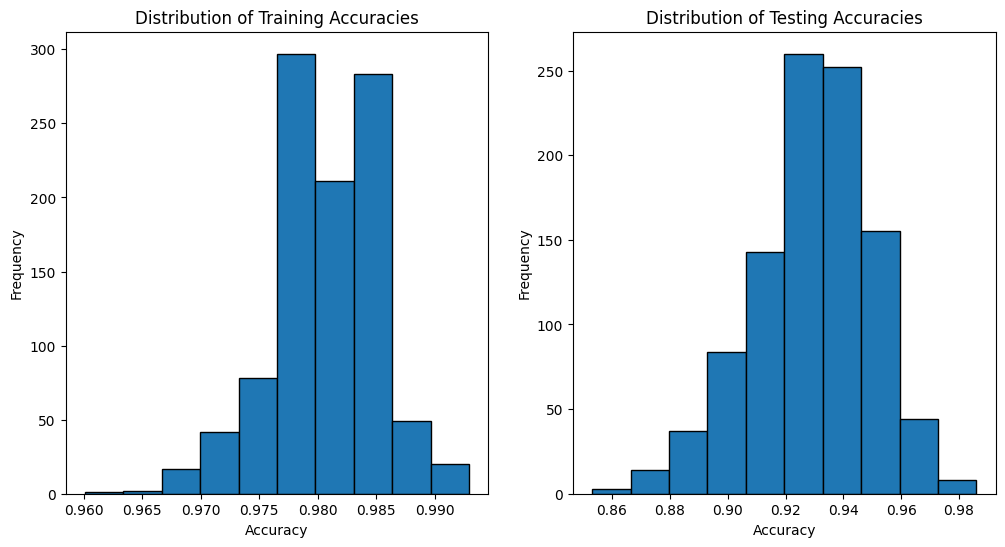

In [23]:
all_inputs = cleaned_bc_data.drop(columns=['diagnosis']).values

# Similarly, we can extract the class labels
all_labels = bc_data['diagnosis'].values

(training_inputs,
 testing_inputs,
 training_classes,
 testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)

clf = DecisionTreeClassifier(max_depth=5, min_samples_split=2, min_samples_leaf=2)

train_accuracies = []
test_accuracies = []

for repetition in range(1000):
    (training_inputs,
     testing_inputs,
     training_classes,
     testing_classes) = train_test_split(all_inputs, all_labels, test_size=0.25)
    
    clf.fit(training_inputs, training_classes)

    train_predict = clf.predict(training_inputs)
    test_predict = clf.predict(testing_inputs)
    
    train_accuracy = accuracy_score(training_classes, train_predict)
    test_accuracy = accuracy_score(testing_classes, test_predict)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(train_accuracies, bins=10, edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Training Accuracies')

plt.subplot(1, 2, 2)
plt.hist(test_accuracies, bins=10, edgecolor='black')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Testing Accuracies')

plt.show()

### Confusion matrix

The next code snippet creates a confusion matrix to evaluate the performance of the Decision Tree Classifier on the test data from the last iteration. Basically, this is a table that summarizes the classification performance by showing the number of true positive, true negative, false positive and false negative predictions. 

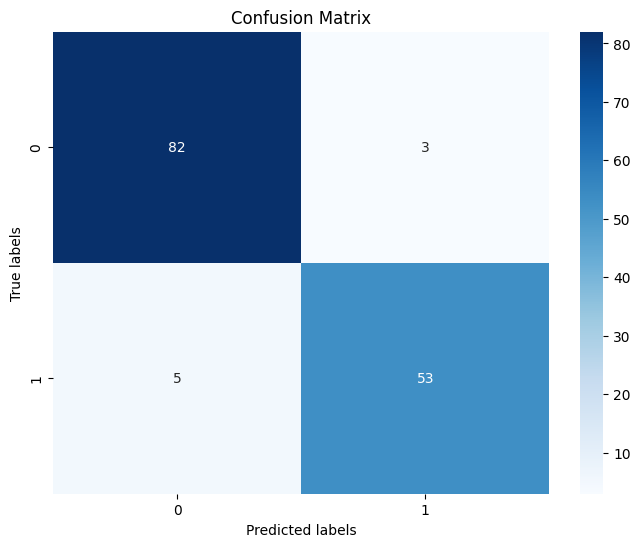

In [24]:
# Confusion matrix da última previsão
conf_matrix = confusion_matrix(testing_classes, test_predict)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Neural Networks Classifier



In [25]:
# Convert the 'diagnosis' column to integers
bc_data['diagnosis'] = bc_data['diagnosis'].map(mapping)

# Selecting relevant columns
selected_columns = ['diagnosis', 'concave_points_worst', 'perimeter_worst', 'concave_points_mean', 'radius_worst', 'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean', 'concavity_mean']
bc_subset = bc_data[selected_columns].sample(250)

# Split data into features (X) and labels (y)
X = bc_subset.drop('diagnosis', axis=1).values
y = bc_subset['diagnosis'].values

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [26]:
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

# Instantiate the model
model = SimpleNN()

In [27]:
# Set loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 1000
for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X).squeeze() 
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

Epoch 1/1000, Loss: 0.5898075103759766
Epoch 2/1000, Loss: 0.44786861538887024
Epoch 3/1000, Loss: 0.2661498785018921
Epoch 4/1000, Loss: 0.21878887712955475
Epoch 5/1000, Loss: 0.23887202143669128
Epoch 6/1000, Loss: 0.16875414550304413
Epoch 7/1000, Loss: 0.04104361683130264
Epoch 8/1000, Loss: 0.1283169388771057
Epoch 9/1000, Loss: 0.5557987093925476
Epoch 10/1000, Loss: 0.12433218210935593
Epoch 11/1000, Loss: 0.25301024317741394
Epoch 12/1000, Loss: 0.09187653660774231
Epoch 13/1000, Loss: 0.005943762604147196
Epoch 14/1000, Loss: 0.018115811049938202
Epoch 15/1000, Loss: 0.013577369041740894
Epoch 16/1000, Loss: 0.023527860641479492
Epoch 17/1000, Loss: 0.09220734238624573
Epoch 18/1000, Loss: 0.06337007880210876
Epoch 19/1000, Loss: 0.18838533759117126
Epoch 20/1000, Loss: 0.026437435299158096
Epoch 21/1000, Loss: 0.030341751873493195
Epoch 22/1000, Loss: 0.13086244463920593
Epoch 23/1000, Loss: 0.07515399158000946
Epoch 24/1000, Loss: 0.03824763372540474
Epoch 25/1000, Loss: 0.

Test Loss: 0.3620949685573578, Test Accuracy: 0.9800000190734863
Confusion Matrix:


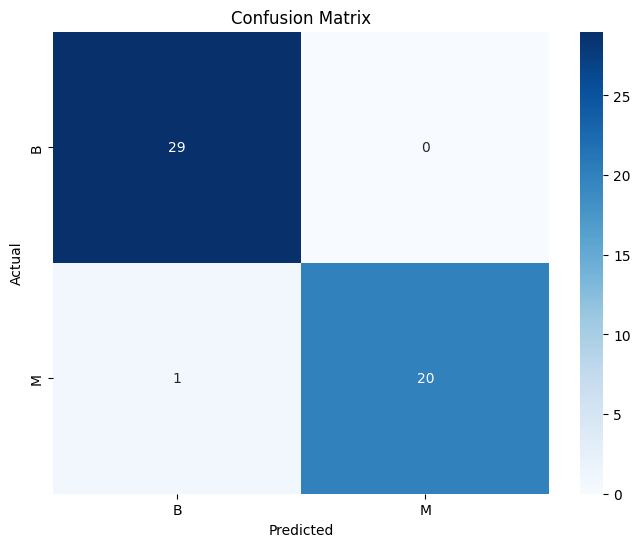

In [29]:
# Evaluate the model
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_tensor).squeeze()
    test_loss = criterion(test_outputs, y_test_tensor)
    test_predictions = (test_outputs > 0.5).float()
    test_accuracy = (test_predictions == y_test_tensor).float().mean()

    print(f'Test Loss: {test_loss.item()}, Test Accuracy: {test_accuracy.item()}')

# Confusion Matrix
conf_matrix = confusion_matrix(y_test_tensor, test_predictions)
print('Confusion Matrix:')
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['B', 'M'], yticklabels=['B', 'M'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()